Hello!
I'm happy to review your project today.
When I will see mistake at the first time, I will just point it out. I let you find it and fix it by 
yourself. I'm trying to prepare you to work as an Data Analyst. SO, at a real job, your team lead 
will do the same. But if you can't handle this task yet, I will give you a more accurate hint at the 
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red 
comments. </div>
<div class="alert alert-block alert-info"> <b>Student comment</b> <a class="tocSkip"></a> 

<div class="alert alert-block alert-success">
    
<b>**General feedback**</b> <a class="tocSkip"></a>
    
Hi, Jose



<span class="text-danger"> We have an issue with code here Please fix it To be sure that all code runs well use tab Kernel - Restart & Run All Also I want to ask you not to delete my comments - without them review of your project takes much longer time
</span>
    
Waiting for a new version

<div class="alert alert-block alert-success">
    
<b>**General feedback v2**</b> <a class="tocSkip"></a>
    
Hi, Jose



<span class="text-danger"> We have an issue with code Please fix it To be sure that all code runs well use tab Kernel - Restart & Run All
</span>
    
Waiting for a new version

<div class="alert alert-block alert-success">
    
<b>**General feedback v3**</b> <a class="tocSkip"></a>
    
Hi, Jose
    
Thank you for your corrections
    
Now your project is perfect
    
I am happy to say that your project has been accepted
    
Keep up good work and good luck in the next sprint

<div class="alert alert-block alert-info"> <b> I apologize for the deleted comments, the notebook would no longer run properly when i got it back and i had to start over from my first iteration. </b> <a class="tocSkip"></a> 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please add short project description~~ </div>

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
It is ok)</div>

### Integrated project: I work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. Allowing to spot potential big winners and plan advertising campaigns. In this project i will use the information to find the best options for advertisement.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import seaborn as sns 

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()
df.columns = [x.lower() for x in df.columns]
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

I removed those two rows since they were missing almost all information and filling them would be a complete guess and especially the names. 

In [4]:
df.dropna(subset=['year_of_release'], inplace=True)
df.dropna(subset=['name'], inplace=True)
display(df.sample())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
525,WWE SmackDown! Here Comes the Pain,PS2,2003.0,Fighting,1.32,1.06,0.04,0.38,NaN,NaN,NaN


<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
It is better to use display instead of print here</div>

I replaced them with the median values so they would be at the center

In [5]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df['critic_score'] = df['critic_score'].astype('Int64')
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(4), int64(1), object(5)
memory usage: 1.5+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

The year of release column makes more sense as an int than a float since the release dates are based on years which are whole numbers. The critic scores are easier to read as whole numbers as well, it looks much cleaner.

In [6]:
nan_rows = df[df['name'].isna()]
platform_names = df['platform'].unique()
print(platform_names)
boolean = df.duplicated().any().sum()
print(boolean)

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
0


In [7]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
display(df['user_score'].unique())

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

The TBD value was essentially a NaN value, to replace all TBD coerce was used to turn everything to NaN then i filled it with the median user score to give it an average in abcence of any other information that could indicate the user score.

In [8]:
df['rating'] = df['rating'].fillna('unknown')
display(df['rating'].head())

0          E
1    unknown
2          E
3          E
4    unknown
Name: rating, dtype: object

In [9]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df['total_sales'].head())
display(df.head(20))

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,unknown,28.31


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

~~You already filled in missing values with 'unknown' and dont have NaNs in this column So there is no need to fill in them with mode Please delete these line of code~~</div>

i opted to use lambda and mode to get the most commonly used value per genre to fill the rating as most similar genres will have similar ratings.

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

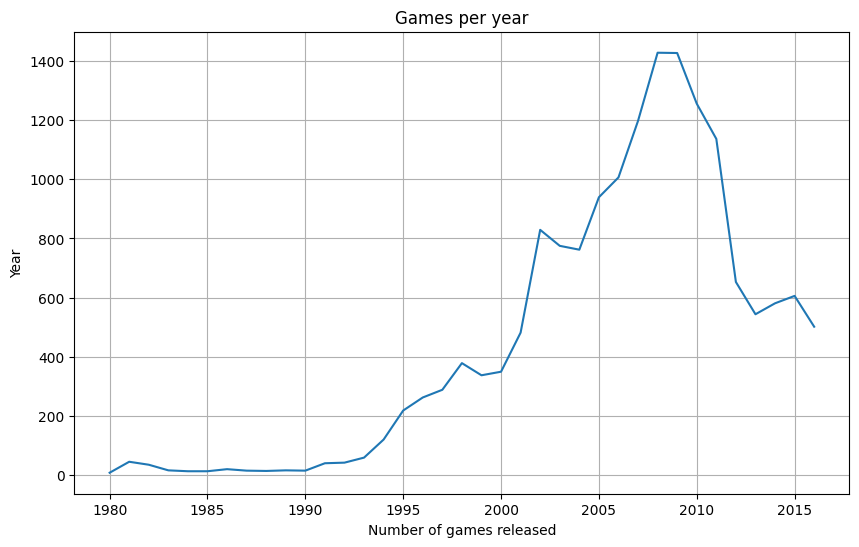

In [10]:
games_per_year = df['year_of_release'].value_counts().sort_index()

display(games_per_year)

plt.figure(figsize=(10, 6))

plt.plot(games_per_year)

plt.title('Games per year')
plt.xlabel('Number of games released')
plt.ylabel('Year')
plt.grid(True)  
plt.show()  

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Well done </div>

The number of games released continues to rise as the years progress which i believe is significant.

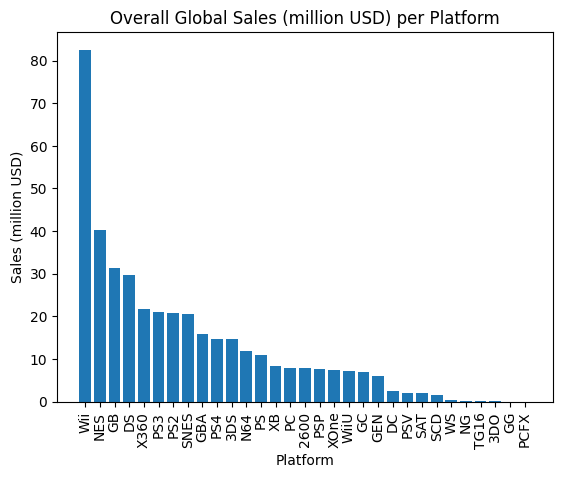

In [11]:
plt.bar(df['platform'], df['total_sales'])
plt.title('Overall Global Sales (million USD) per Platform')
plt.xlabel('Platform')
plt.ylabel('Sales (million USD)')
plt.xticks(rotation=90)
plt.show()

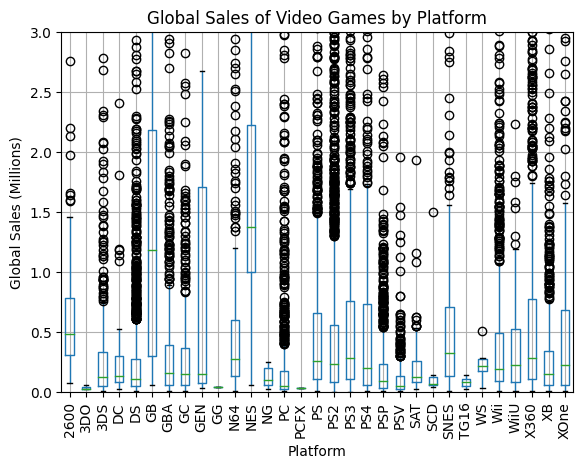

In [12]:
df.boxplot(by='platform', column=['total_sales'])
plt.title('Global Sales of Video Games by Platform')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=90)
plt.ylim(0,3)
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please add boxplots for total sales broken down by platform~~</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>

~~Now we can see only outliers Please use plt.ylim(0,3) to display boxplots~~</div>

In [13]:
platform_sales = df.groupby('platform')['total_sales'].sum()

top_5_platforms = platform_sales.nlargest(5).index

filtered_df = df[df['platform'].isin(top_5_platforms)]

top_5_data = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

grouped_data = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

grouped_data_filtered = grouped_data.loc[2006:2016]

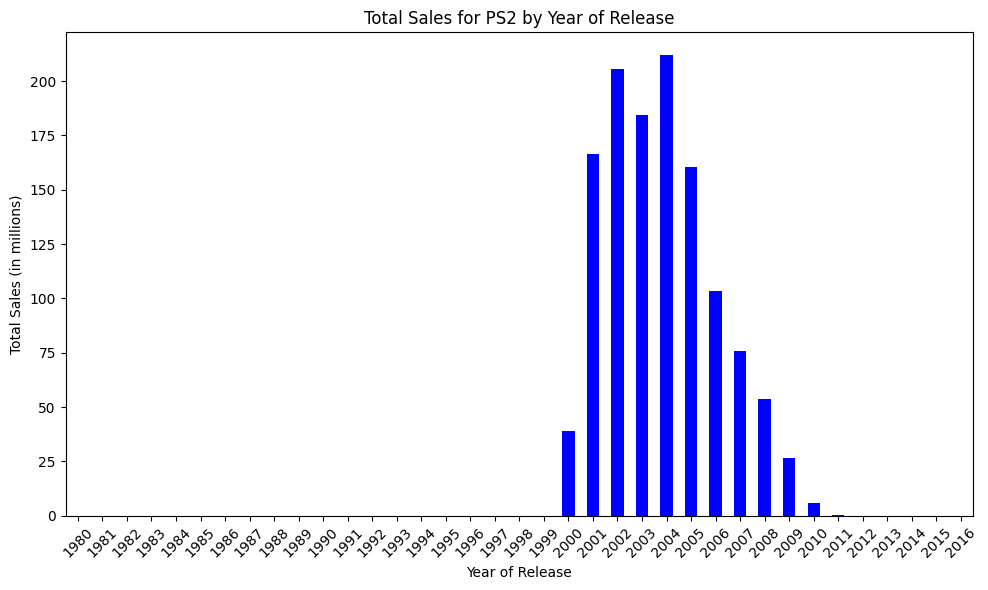

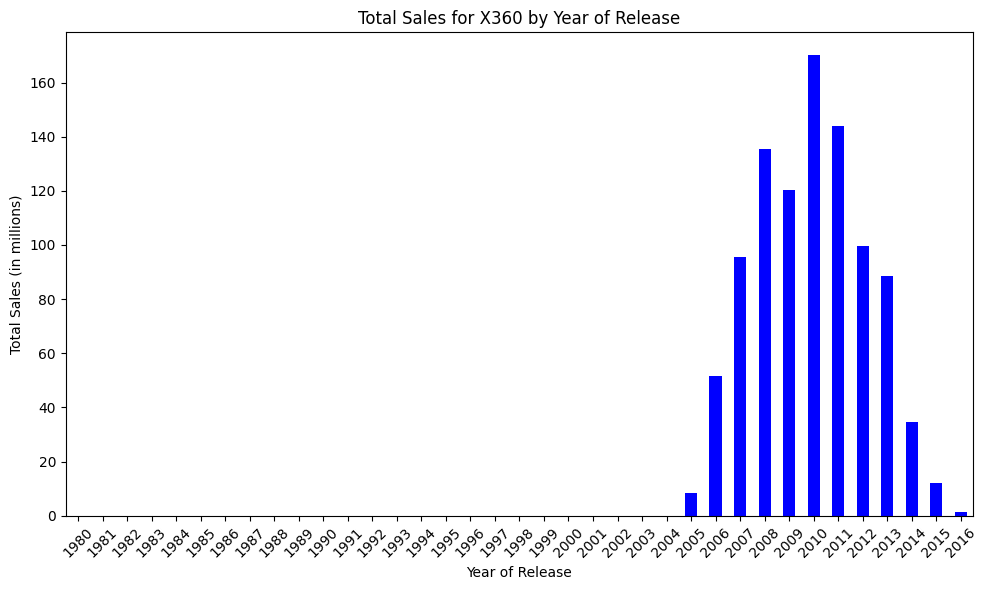

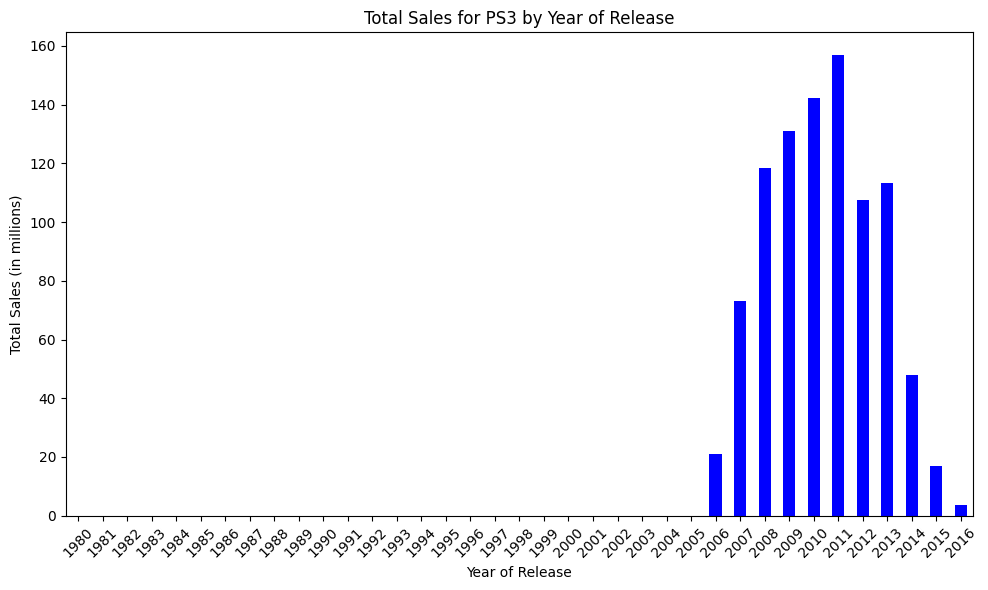

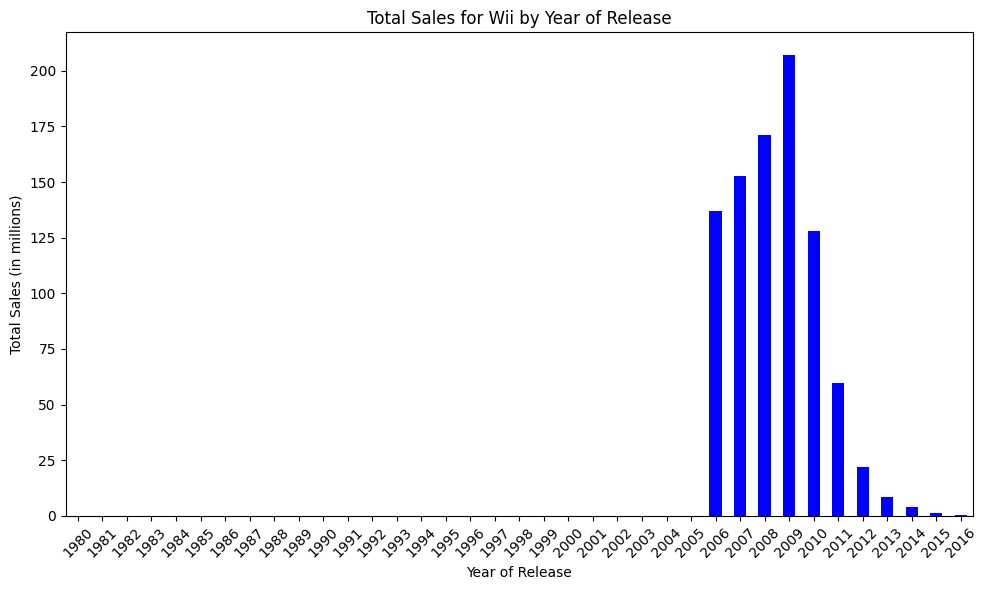

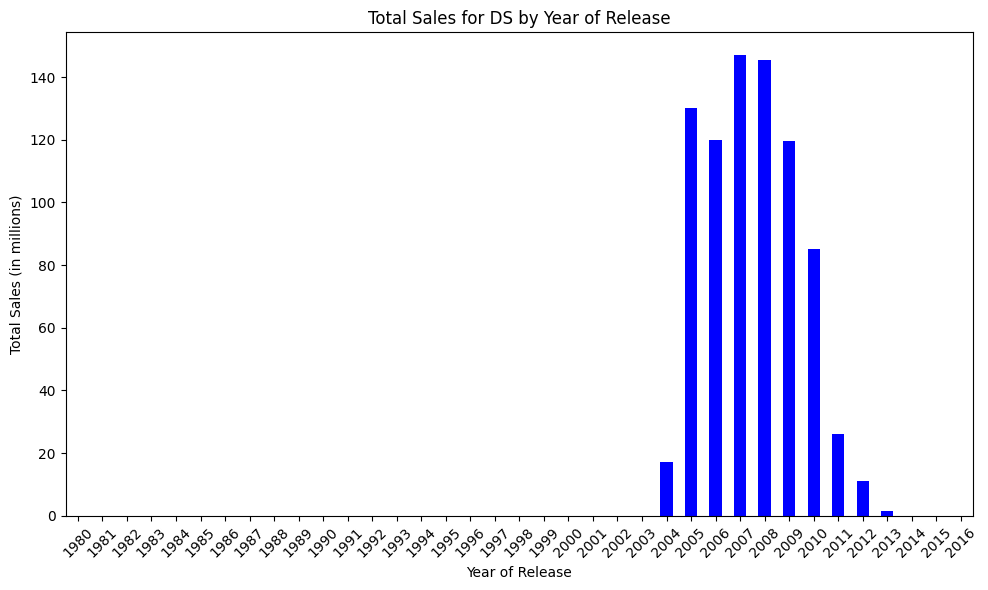

In [14]:
for platform in top_5_platforms:
    plt.figure(figsize=(10, 6))
    platform_data = grouped_data[platform]
    platform_data.plot(kind='bar', color='blue')
    plt.title(f'Total Sales for {platform} by Year of Release')
    plt.xlabel('Year of Release')
    plt.ylabel('Total Sales (in millions)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

There is an average cycle of 10 years for platforms to fade. PS2 and DS were both very popular and now have zero sales and the other plaforms on the top 5 are also getting closer to zero.

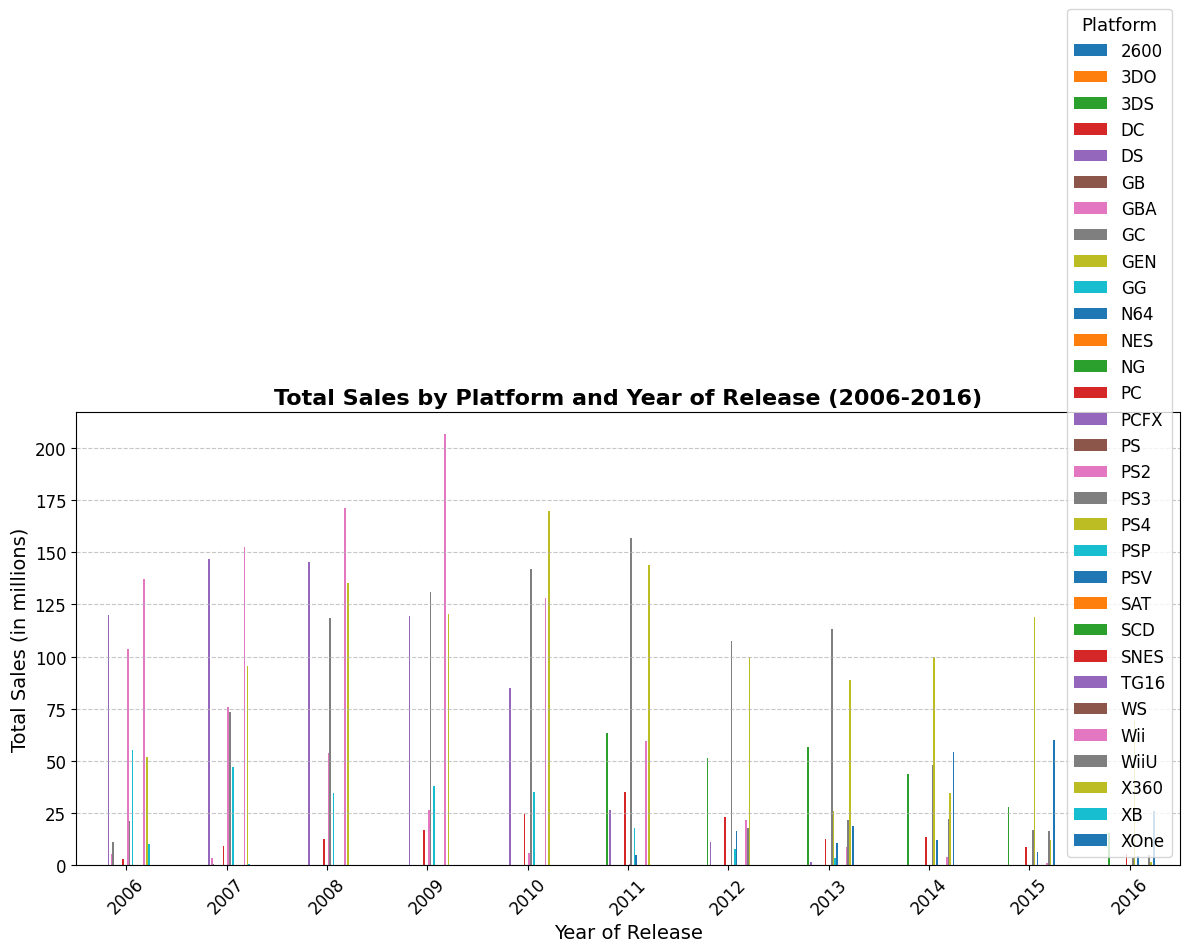

In [15]:
grouped_data_filtered.plot(kind='bar', figsize=(12, 8), color=plt.cm.tab10.colors)
plt.title('Total Sales by Platform and Year of Release (2006-2016)', fontsize=16, fontweight='bold')
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.legend(title='Platform', fontsize=12, title_fontsize='13')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
It is very dificult to analyza this grath because of many values You can filter it and leave only top 5 platforms</div>

In [16]:
grouped_data_filtered = grouped_data_filtered.dropna(axis=1, how='all')

display(grouped_data_filtered)

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2006,NaN,NaN,119.81,5.28,11.26,2.85,103.42,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,9.28,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.20,NaN,26.18,NaN,NaN,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN,NaN
2012,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,NaN,NaN,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96
2014,43.76,NaN,NaN,NaN,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,NaN,54.07


The only relevant data would be related to XOne, 3DS, PC, and PS4 as the rest have either declined completely or are at the end of the process, only keeping the ones which still have a large amount of purchases will allow me to build an accurate 2017 model. Pc is included despite lower sales due to the consistent sales.

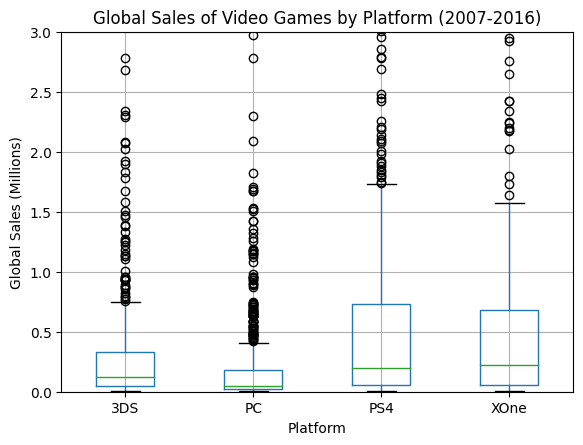

In [17]:
potential_consoles = df[(df['year_of_release'] >= 2007) & (df['year_of_release'] <= 2016) & (df['platform'].isin(['XOne', 'PS4', '3DS', 'PC']))]
df2 = df[(df['year_of_release'] >= 2007) & (df['year_of_release'] <= 2016)]

potential_consoles.boxplot(by='platform', column=['total_sales'])
plt.title('Global Sales of Video Games by Platform (2007-2016)')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.ylim(0,3)
plt.show()

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super </div>

The differences in sales are very different but averages are about the same.

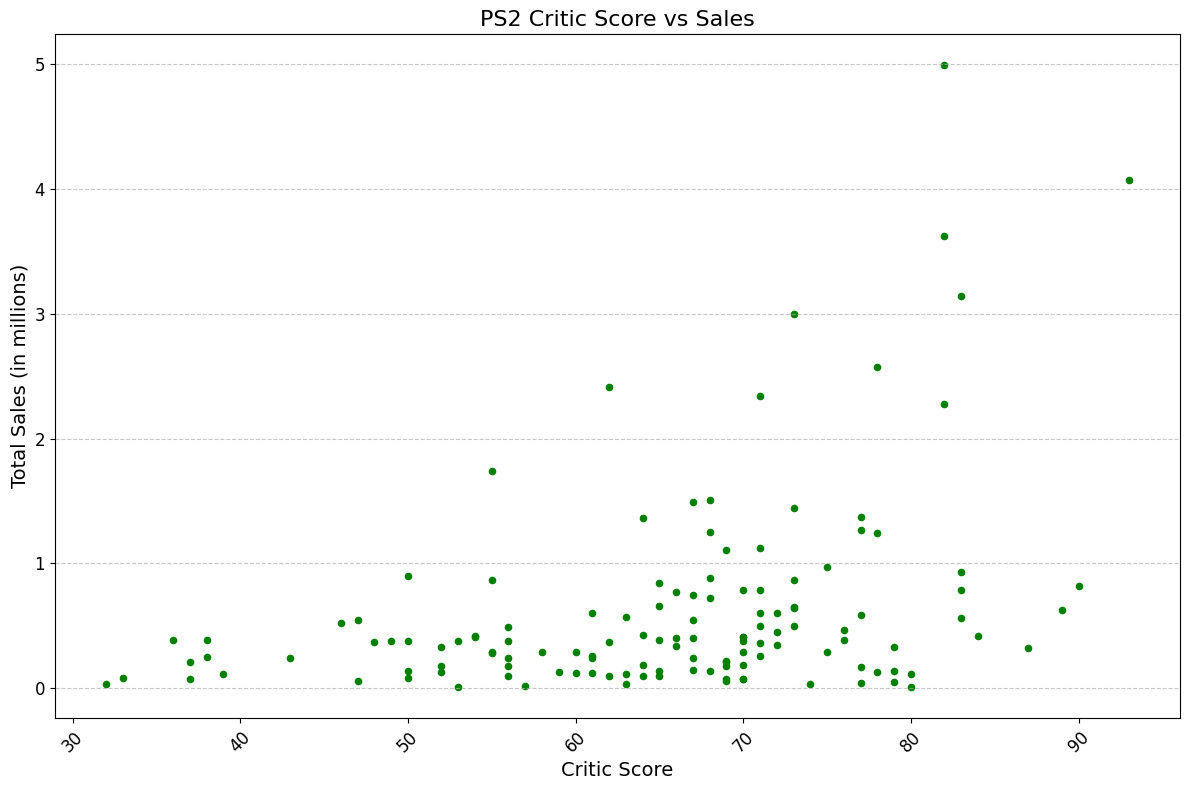

The correlation between critic score and total sales is 0.29255315488863887


/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [18]:
PS2_only = df2[(df2['platform'] == 'PS2')]
PS2_only.plot.scatter(x='critic_score', y='total_sales',figsize=(12, 8), color='green')
plt.title('PS2 Critic Score vs Sales', fontsize=16)
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()
df2.loc[:, 'critic_score'] = df2['critic_score'].astype('float')
correlation = df2['critic_score'].corr(df2['total_sales'])
print(f'The correlation between critic score and total sales is {correlation}')

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~We have an issue with code here Please fix it~~</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~We still have an issue Please check names of variables - you need to use correlation instead of correlation2~~</div>

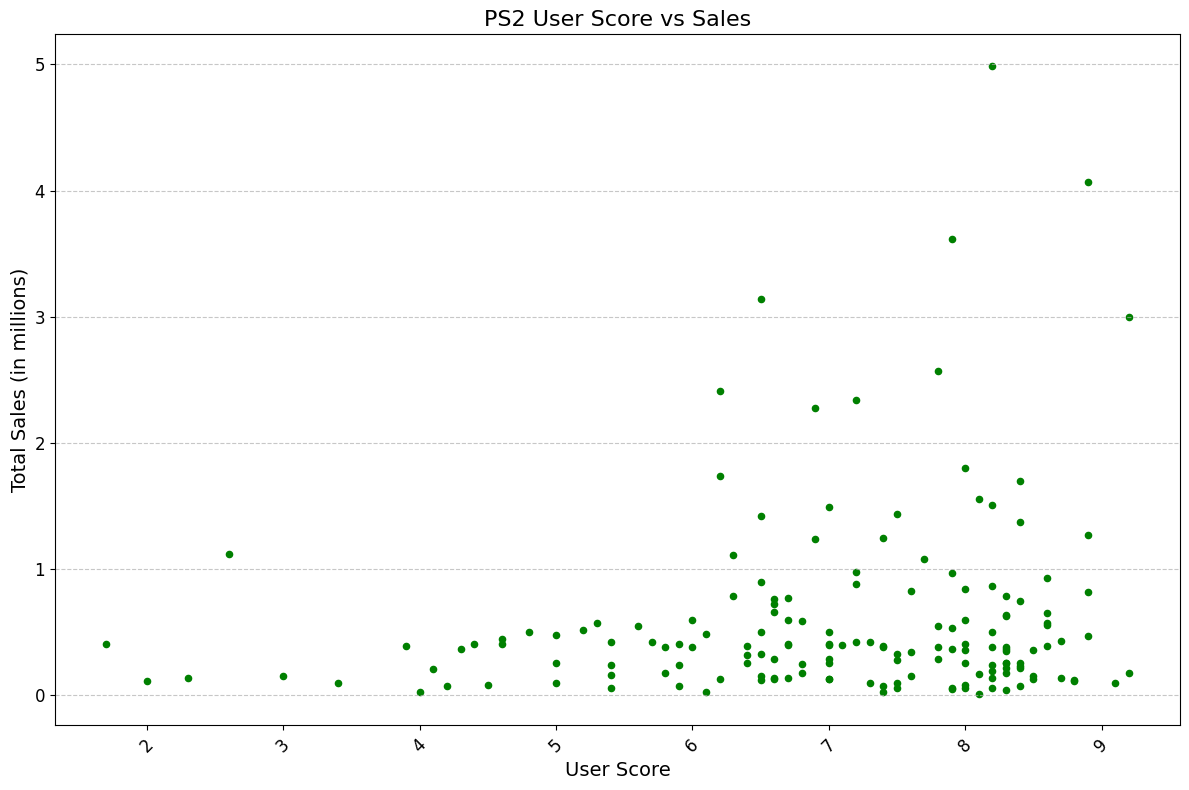

The correlation between user score and total sales is 0.09421432957464258


In [19]:
PS2_only.plot.scatter(x='user_score', y='total_sales',figsize=(12, 8), color='green')
plt.title('PS2 User Score vs Sales', fontsize=16)
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()
correlation2 = df2['user_score'].corr(df2['total_sales'])
print(f'The correlation between user score and total sales is {correlation2}')

Both user score and critic score seem to correlate with sales as the higher the score the more was sold but according to the corr() formula there isn't a strong correlation. critic score seems to have a higher affect according to this information.

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Well done Right conclusion </div>

In [20]:
ps2 = df2[df2['platform'] == 'PS2']['name'].unique()
non_ps2 = df2[df2['platform'] != 'PS2']['name'].unique()
non_ps22 = df2[df2['platform'] != 'PS2']
common_games = np.intersect1d(ps2, non_ps2)

not_ps2 = non_ps22[non_ps22['name'].isin(common_games)]
display(not_ps2)
top_genre = not_ps2.groupby(['genre'])['total_sales'].sum().reset_index()
top_genre

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
122,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,NaN,NaN,unknown,6.64
202,FIFA Soccer 11,PS3,2010,Sports,0.61,3.28,0.06,1.12,89.0,8.0,E,5.07
234,Guitar Hero III: Legends of Rock,Wii,2007,Misc,3.04,1.11,0.00,0.43,86.0,8.4,T,4.58
239,Guitar Hero III: Legends of Rock,X360,2007,Misc,3.19,0.91,0.01,0.42,85.0,7.9,T,4.53
278,FIFA 12,X360,2011,Sports,0.84,2.78,0.02,0.53,NaN,NaN,unknown,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16532,Alone in the Dark,PC,2008,Adventure,0.00,0.01,0.00,0.00,55.0,5.7,M,0.01
16545,Madagascar: Escape 2 Africa,PC,2008,Action,0.01,0.00,0.00,0.00,58.0,8.0,E10+,0.01
16559,Katekyoo Hitman Reborn! Kindan no Yami no Delta,Wii,2008,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16610,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


,genre,total_sales
0,Action,120.20
1,Adventure,6.60
2,Fighting,20.80
3,Misc,64.04
4,Platform,23.93
5,Puzzle,2.46
6,Racing,28.16
7,Role-Playing,3.54
8,Shooter,5.75
9,Simulation,5.48


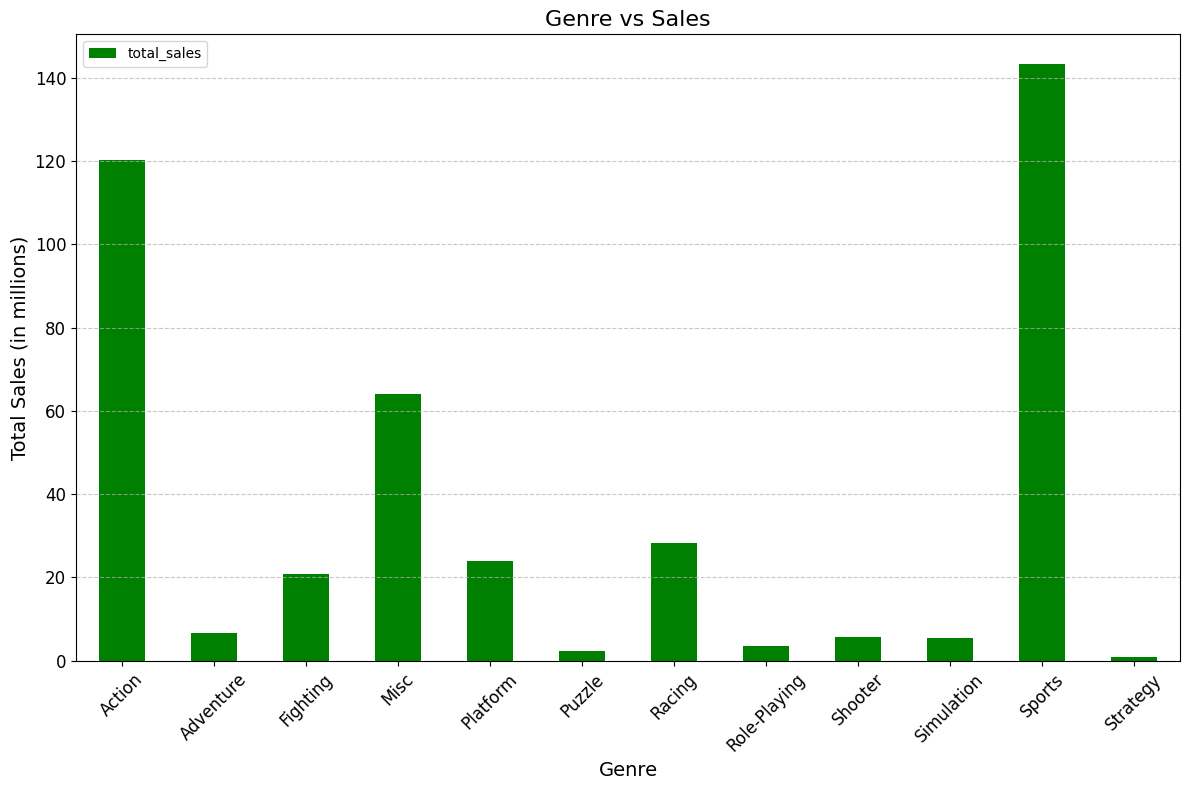

In [21]:
top_genre.plot.bar(x='genre', y='total_sales',figsize=(12, 8), color='green')
plt.title('Genre vs Sales', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Racing'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Role-Playing'),
  Text(6, 0, 'Shooter'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Adventure'),
  Text(10, 0, 'Puzzle'),
  Text(11, 0, 'Strategy')])

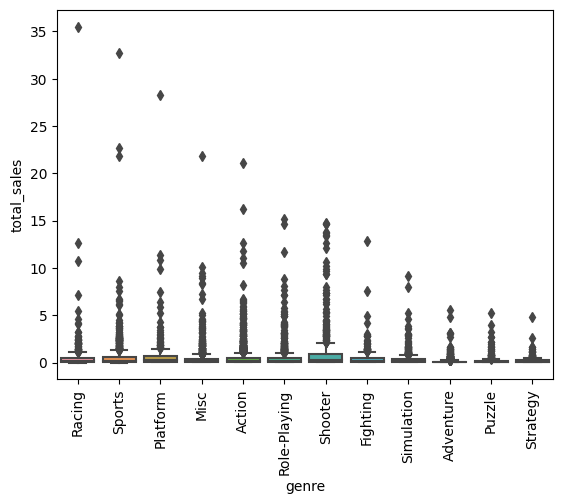

In [22]:
sns.boxplot(data=df2, x='genre', y='total_sales')
plt.xticks(rotation=90)

Sports and action have the most total sales and are the most profitable while puzzle and strategy have the least sales.

<div class="alert alert-block alert-warning"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Here it also you need to use plt.ylim()</div>

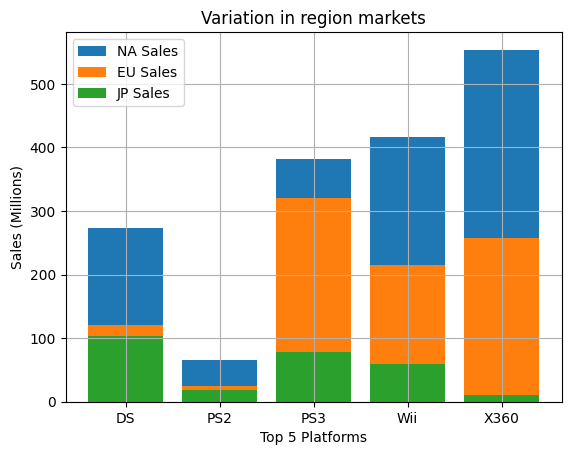

In [23]:
na_sales_region = df2.groupby('platform')['na_sales'].sum().reset_index()
eu_sales_region = df2.groupby('platform')['eu_sales'].sum().reset_index()
jp_sales_region = df2.groupby('platform')['jp_sales'].sum().reset_index()

na_sales_regions = na_sales_region[na_sales_region['platform'].isin(top_5_platforms)]
eu_sales_regions = eu_sales_region[eu_sales_region['platform'].isin(top_5_platforms)]
jp_sales_regions = jp_sales_region[jp_sales_region['platform'].isin(top_5_platforms)]

plt.bar(na_sales_regions['platform'], na_sales_regions['na_sales'], label='NA Sales')
plt.bar(eu_sales_regions['platform'], eu_sales_regions['eu_sales'], label='EU Sales')
plt.bar(jp_sales_regions['platform'], jp_sales_regions['jp_sales'], label='JP Sales')

plt.title('Variation in region markets')
plt.xlabel('Top 5 Platforms')
plt.ylabel('Sales (Millions)')
plt.legend() 
plt.grid(True)  
plt.show()  

Japanese sales are leaning towards the handeheld while it is the least popular console among the other regions who prefer the home consoles. North america has the largest share of sales followed by the EU and ending with JP.

In [24]:
genre_sales = df2.groupby('genre')['total_sales'].sum()

top_5_genre = genre_sales.nlargest(5).index

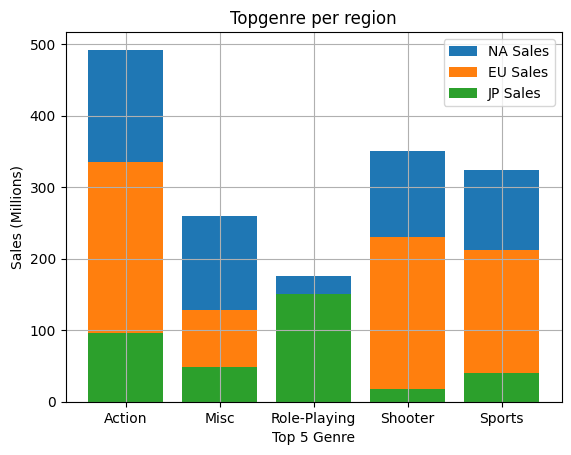

In [25]:
na_genre = df2.groupby('genre')['na_sales'].sum().reset_index()
eu_genre = df2.groupby('genre')['eu_sales'].sum().reset_index()
jp_genre = df2.groupby('genre')['jp_sales'].sum().reset_index()

na_genres = na_genre[na_genre['genre'].isin(top_5_genre)]
eu_genres = eu_genre[eu_genre['genre'].isin(top_5_genre)]
jp_genres = jp_genre[jp_genre['genre'].isin(top_5_genre)]

plt.bar(na_genres['genre'], na_genres['na_sales'], label='NA Sales')
plt.bar(eu_genres['genre'], eu_genres['eu_sales'], label='EU Sales')
plt.bar(jp_genres['genre'], jp_genres['jp_sales'], label='JP Sales')

plt.title('Topgenre per region')
plt.xlabel('Top 5 Genre')
plt.ylabel('Sales (Millions)')
plt.legend() 
plt.grid(True)  
plt.show()  

RPG games dominate in Japan much more than in the other regions, all genres between EU and NA sell at a similar rate other than the RPG genre which NA seems to be the least interested in. All regions are sport game fans but japan seems to be less inclined. Shooters are not as popular in Japan as the other two regions while platforms are more popular in japan compared to the others. overall Japan seesms to be more interested in Platform games and RPG while the other two regions prefer Action and Sports.

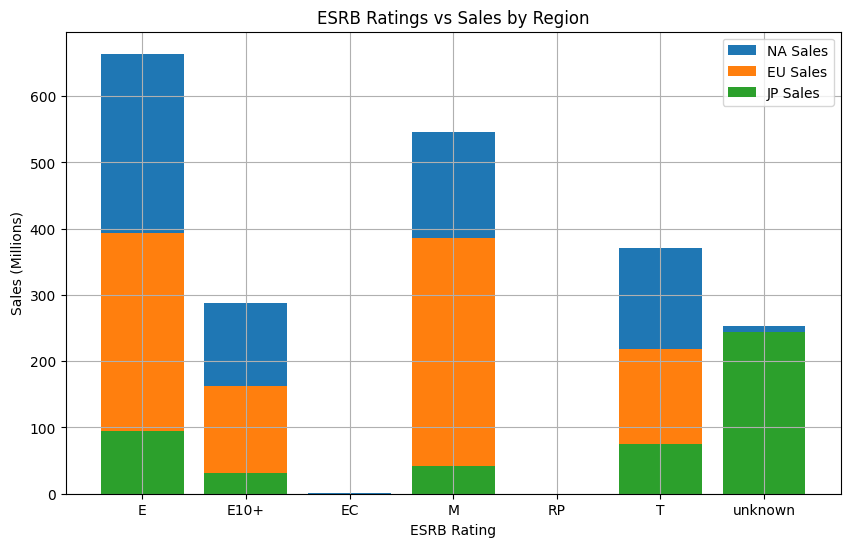

In [26]:
na_ratings = df2.groupby('rating')['na_sales'].sum().reset_index()
eu_ratings = df2.groupby('rating')['eu_sales'].sum().reset_index()
jp_ratings = df2.groupby('rating')['jp_sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(na_ratings['rating'], na_ratings['na_sales'], label='NA Sales')
plt.bar(eu_ratings['rating'], eu_ratings['eu_sales'], label='EU Sales')
plt.bar(jp_ratings['rating'], jp_ratings['jp_sales'], label='JP Sales')

plt.title('ESRB Ratings vs Sales by Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (Millions)')
plt.legend() 
plt.grid(True)  
plt.show()  

The sales distribution seems to be the same across all regions where the most sold rating in one region matches the others. 

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Great Very detailed analysis of region sales </div>

In [27]:
xbox_one_ratings = df2[df2['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = df2[df2['platform'] == 'PC']['user_score'].dropna()

t_stat1, p_value1 = ttest_ind(xbox_one_ratings, pc_ratings)

alpha = 0.05
if p_value1 < alpha:
    print(f"Reject the null hypothesis: With a P-value of {p_value1} the average user ratings are different.")
else:
    print(f"Fail to reject the null hypothesis: With a P-value of {p_value1} the average user ratings are the same.")

Fail to reject the null hypothesis: With a P-value of 0.05554752084307562 the average user ratings are the same.


In [28]:
action_ratings = df2[df2['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df2[df2['genre'] == 'Sports']['user_score'].dropna()

t_stat2, p_value2 = ttest_ind(action_ratings, sports_ratings)

alpha = 0.05
if p_value2 < alpha:
    print(f"Reject the null hypothesis: With a P-value of {p_value2} the average user ratings for Action and Sports genres are different.")
else:
    print(f"Fail to reject the null hypothesis: WIth a p-value of {p_value2} the average user ratings for Action and Sports genres are the same.")

Reject the null hypothesis: With a P-value of 1.0894514919563483e-12 the average user ratings for Action and Sports genres are different.


<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Just perfect </div>

Conclusion: The most profitable games are rate E as they have a more diverse audience followed by T then M. When it comes to regional sales the best genre to advertise in Japan would be RPG games while the best for NA and EU would be action closely followed by sports, and the consoles to focus on would be the PS2 and X360 or likely the next generation. 